# CODE THE PROBLEM
## ROUND-1
Kaustuv Mishra

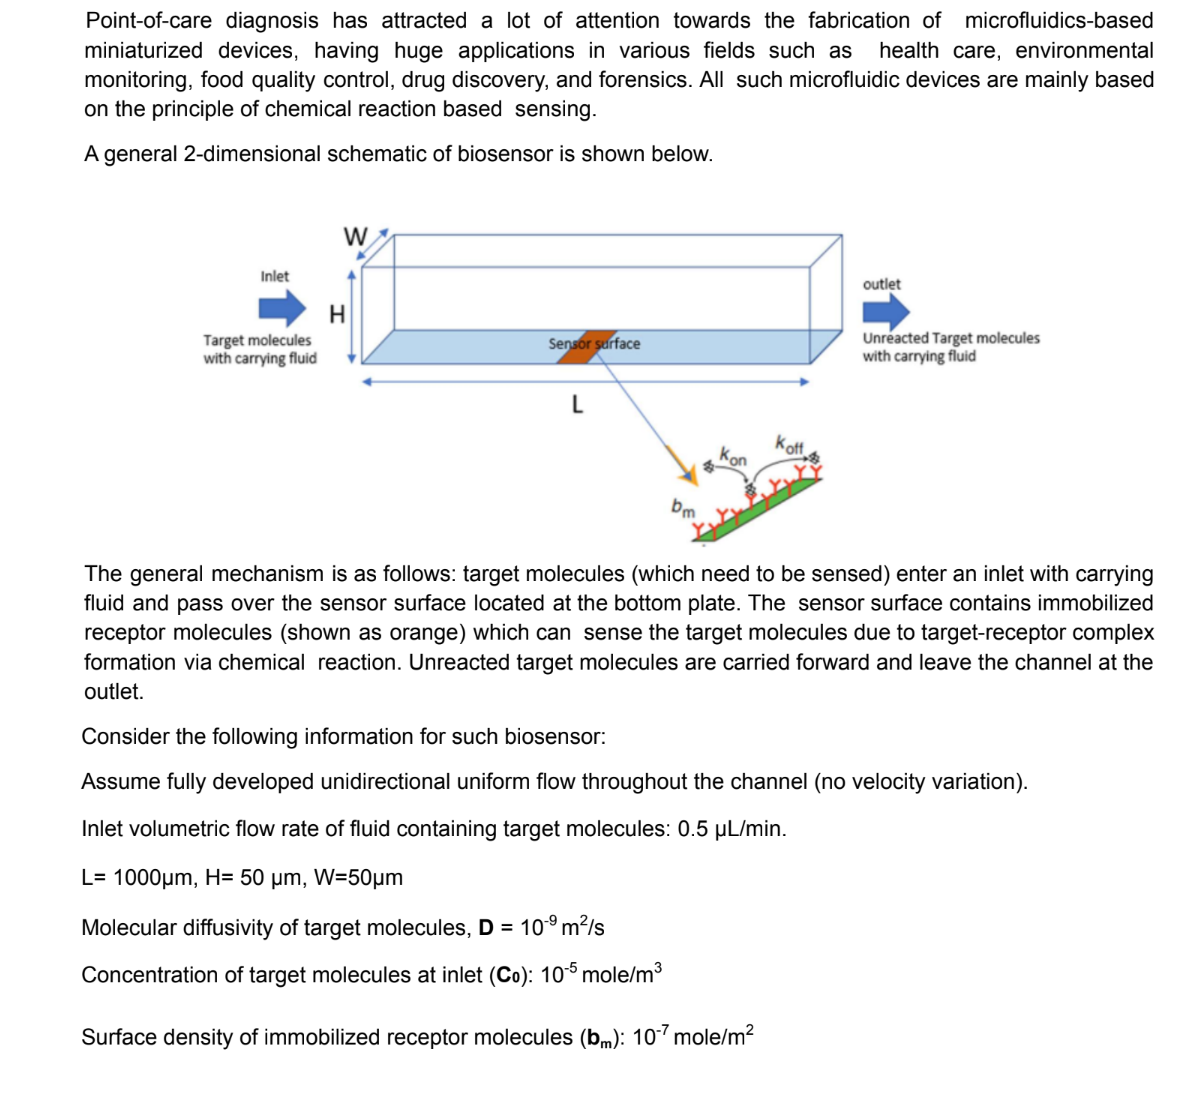
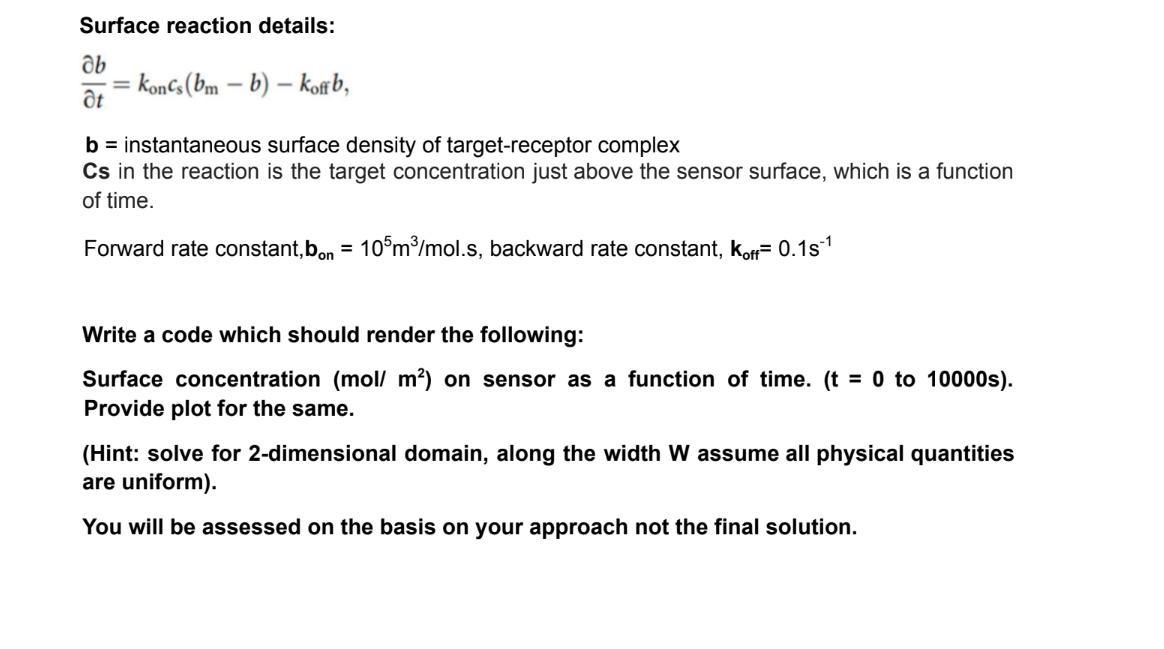

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
L = 1000e-6  # channel length (m)
H = 50e-6  # channel height (m)
W = 50e-6  # channel width (m)
D = 1e-9  # molecular diffusivity (m^2/s)
bm = 1e-7  # surface density of immobilized receptor molecules (mol/m^2)
bon = 1e5  # forward rate constant (m^3/mol.s)
koff = 0.1  # backward rate constant (s^-1)
C0 = 1e-5  # concentration at inlet (mol/m^3)
Q = 0.5e-9/60  # inlet volumetric flow rate (m^3/s)
t_end = 10000  # end time (s)
dt = 0.1  # time step (s)
dy = 1e-7  # spatial resolution (m)
N = int(H/dy) + 1  # number of spatial grid points
M = int(t_end/dt) + 1  # number of time grid points

In [3]:
# Initialize arrays
C = np.zeros((N, M))
Cs = np.zeros((N, M))

In [4]:
# Set initial conditions
C[:, 0] = C0

In [5]:
# Define functions
def calc_Cs(C):
    return bon/koff * C/(C + (bm/koff))

In [6]:
# Main loop
for j in range(M-1):
    # Calculate surface concentration
    Cs[:, j+1] = calc_Cs(C[:, j])

    # Update bulk concentration
    for i in range(1, N-1):
        C[i, j+1] = C[i, j] + D*dt/dy**2 * (C[i+1, j] - 2*C[i, j] + C[i-1, j]) \
                    - koff*C[i, j]*dt + bon*Cs[i, j+1]/(1 + koff*dt)

    # Apply boundary conditions
    C[0, j+1] = C[1, j+1]
    C[N-1, j+1] = C[N-2, j+1] + Q*dy/L*dt

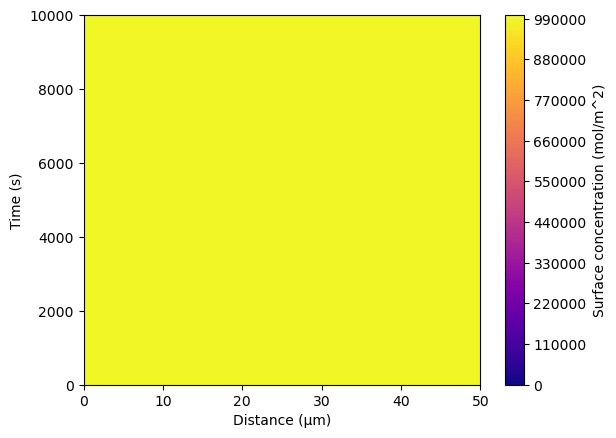

In [7]:
# Plot results
x = np.linspace(0, H, N) * 1e6  # spatial grid (microns)
t = np.linspace(0, t_end, M)  # time grid (seconds)
X, T = np.meshgrid(x, t)
plt.contourf(X, T, Cs.T, levels=100, cmap='plasma')
plt.xlabel('Distance (μm)')
plt.ylabel('Time (s)')
plt.colorbar(label='Surface concentration (mol/m^2)')
plt.show()